In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [25]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [13]:
# We can view all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [14]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [31]:
#Exploring table columns for Measurement table
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


### Design a query to retrieve the last 12 months of precipitation data and plot the results

In [253]:
#Viewing data

result = engine.execute("SELECT *\
                        FROM Measurement\
                        ORDER BY date DESC\
                        LIMIT 5;")
for row in result:
    print(row)

(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)
(7635, 'USC00514830', '2017-08-23', 0.0, 82.0)
(12187, 'USC00519523', '2017-08-23', 0.08, 82.0)
(19550, 'USC00516128', '2017-08-23', 0.45, 76.0)
(2723, 'USC00519397', '2017-08-22', 0.0, 82.0)


In [250]:
# Calculate the date 1 year ago from the last data point in the database
#End date
select_end_date = engine.execute("SELECT DATE(date) as 'e_date' FROM Measurement\
                        ORDER BY e_date DESC\
                        LIMIT 1")
for row in select_end_date:
    print("END DATE:",row['e_date'])
        
end_date=row['e_date']
print(end_date)


END DATE: 2017-08-23
2017-08-23


In [286]:
# Calculate the date 1 year ago from the last data point in the database
#Start date
select_start_date=engine.execute("SELECT DATE('2017-08-23','-1 year') as s_date")
for row in select_start_date:
    print(row['s_date'])
start_date=row['s_date']
start_date

2016-08-23


'2016-08-23'

In [291]:
# Perform a query to retrieve the data and precipitation scores
year_ago=engine.execute("SELECT * FROM Measurement\
                        WHERE date BETWEEN date('2016-08-23') AND date('2017-08-23')")
for row in year_ago:
    print(row)

(2364, 'USC00519397', '2016-08-23', 0.0, 81.0)
(2365, 'USC00519397', '2016-08-24', 0.08, 79.0)
(2366, 'USC00519397', '2016-08-25', 0.08, 80.0)
(2367, 'USC00519397', '2016-08-26', 0.0, 79.0)
(2368, 'USC00519397', '2016-08-27', 0.0, 77.0)
(2369, 'USC00519397', '2016-08-28', 0.01, 78.0)
(2370, 'USC00519397', '2016-08-29', 0.0, 78.0)
(2371, 'USC00519397', '2016-08-30', 0.0, 79.0)
(2372, 'USC00519397', '2016-08-31', 0.13, 80.0)
(2373, 'USC00519397', '2016-09-01', 0.0, 81.0)
(2374, 'USC00519397', '2016-09-02', 0.0, 80.0)
(2375, 'USC00519397', '2016-09-03', 0.0, 79.0)
(2376, 'USC00519397', '2016-09-04', 0.03, 75.0)
(2377, 'USC00519397', '2016-09-05', None, 79.0)
(2378, 'USC00519397', '2016-09-06', None, 76.0)
(2379, 'USC00519397', '2016-09-07', 0.05, 76.0)
(2380, 'USC00519397', '2016-09-08', 0.0, 80.0)
(2381, 'USC00519397', '2016-09-09', 0.03, 79.0)
(2382, 'USC00519397', '2016-09-10', 0.0, 78.0)
(2383, 'USC00519397', '2016-09-11', 0.05, 76.0)
(2384, 'USC00519397', '2016-09-12', 0.0, 78.0)
(23

(7558, 'USC00514830', '2017-05-24', 0.1, 76.0)
(7559, 'USC00514830', '2017-05-25', 0.07, 79.0)
(7560, 'USC00514830', '2017-05-26', 0.0, 79.0)
(7561, 'USC00514830', '2017-05-27', 0.0, 79.0)
(7562, 'USC00514830', '2017-05-28', 0.02, 77.0)
(7563, 'USC00514830', '2017-05-29', 0.0, 79.0)
(7564, 'USC00514830', '2017-05-30', 0.04, 81.0)
(7565, 'USC00514830', '2017-05-31', 0.0, 81.0)
(7566, 'USC00514830', '2017-06-01', 0.0, 81.0)
(7567, 'USC00514830', '2017-06-02', 0.15, 78.0)
(7568, 'USC00514830', '2017-06-03', 0.16, 80.0)
(7569, 'USC00514830', '2017-06-04', 0.05, 79.0)
(7570, 'USC00514830', '2017-06-05', 0.02, 81.0)
(7571, 'USC00514830', '2017-06-06', 0.0, 80.0)
(7572, 'USC00514830', '2017-06-07', 0.0, 81.0)
(7573, 'USC00514830', '2017-06-08', 0.01, 79.0)
(7574, 'USC00514830', '2017-06-09', 0.0, 81.0)
(7575, 'USC00514830', '2017-06-10', 0.53, 78.0)
(7576, 'USC00514830', '2017-06-11', 0.14, 79.0)
(7577, 'USC00514830', '2017-06-12', 0.35, 79.0)
(7578, 'USC00514830', '2017-06-13', 0.1, 75.0)
(7

(14869, 'USC00519281', '2017-05-11', 0.12, 70.0)
(14870, 'USC00519281', '2017-05-12', 0.02, 75.0)
(14871, 'USC00519281', '2017-05-13', 0.12, 76.0)
(14872, 'USC00519281', '2017-05-14', 0.17, 77.0)
(14873, 'USC00519281', '2017-05-15', 0.09, 74.0)
(14874, 'USC00519281', '2017-05-16', 0.03, 74.0)
(14875, 'USC00519281', '2017-05-17', 0.07, 74.0)
(14876, 'USC00519281', '2017-05-18', 0.13, 69.0)
(14877, 'USC00519281', '2017-05-19', 0.01, 68.0)
(14878, 'USC00519281', '2017-05-20', 0.02, 76.0)
(14879, 'USC00519281', '2017-05-21', 0.01, 74.0)
(14880, 'USC00519281', '2017-05-22', 0.06, 71.0)
(14881, 'USC00519281', '2017-05-23', 0.06, 71.0)
(14882, 'USC00519281', '2017-05-24', 0.3, 74.0)
(14883, 'USC00519281', '2017-05-25', 0.2, 74.0)
(14884, 'USC00519281', '2017-05-26', 0.0, 74.0)
(14885, 'USC00519281', '2017-05-27', 0.0, 74.0)
(14886, 'USC00519281', '2017-05-28', 0.08, 80.0)
(14887, 'USC00519281', '2017-05-29', 0.4, 74.0)
(14888, 'USC00519281', '2017-05-30', 1.12, 72.0)
(14889, 'USC00519281', '2

In [299]:
# Save the query results as a Pandas DataFrame and set the index to the date column
import pandas as pd
conn = engine.connect()
results = pd.read_sql("SELECT * FROM Measurement\
                        WHERE date BETWEEN date('2016-08-23') AND date('2017-08-23')\
                        ORDER BY DATE(date)"
                      , conn)
df=results[["date","prcp"]]

df_new_index=df.set_index("date")
# Sort the dataframe by date
sorted_df=df_new_index.sort_values("date")
sorted_df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


In [302]:
sorted_df.dropna(inplace=True)
sorted_df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


In [319]:
print(df['date'].nunique())

366


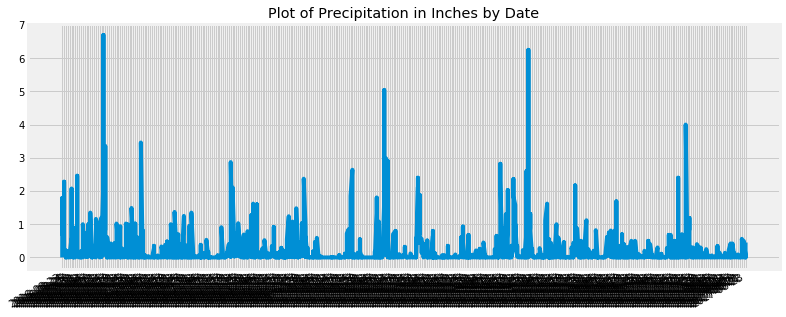

In [372]:
# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(sorted_df)
ax.set_title('Plot of Precipitation in Inches by Date')
fig.autofmt_xdate()

# Define the date format
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.show()

In [373]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [378]:
#Exploring table columns for Station table
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [408]:
# Design a query to show how many stations are available in this dataset?
COUNT_QUERY = engine.execute("SELECT COUNT(DISTINCT(station))\
                        FROM Measurement")
for row in COUNT_QUERY:
    print(row)


(9,)


In [418]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
ACTIVE_STATIONS = engine.execute("SELECT station,COUNT(station)\
                        FROM Measurement\
                        GROUP BY station\
                        ORDER BY COUNT(station) DESC")
for row in ACTIVE_STATIONS:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [420]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
TEMPERATURE_RECORDINGS = engine.execute("SELECT station,max(tobs),min(tobs),avg(tobs)\
                        FROM Measurement\
                       WHERE station='USC00519281'")
for row in TEMPERATURE_RECORDINGS:
    print(row)

('USC00519281', 85.0, 54.0, 71.66378066378067)


In [423]:
# Choose the station with the highest number of temperature observations.
HIGHEST_TEMP_OBS = engine.execute("SELECT station,COUNT(tobs)\
                        FROM Measurement\
                        GROUP BY station\
                        ORDER BY COUNT(tobs) DESC")
for row in HIGHEST_TEMP_OBS:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


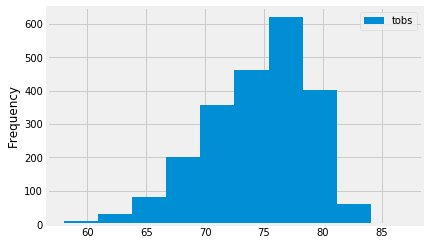

In [425]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = pd.read_sql("SELECT * FROM Measurement\
                        WHERE date BETWEEN date('2016-08-23') AND date('2017-08-23')\
                        ORDER BY DATE(date)"
                      , conn)
df=results[["date","tobs"]]

df_new_index=df.set_index("date")
# Sort the dataframe by date
sorted_df=df_new_index.sort_values("date")
sorted_df.plot.hist()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
